In [1]:
# 게시판 스크래핑 -> 필요없는 단어 없애고 명사,관형사(형용사)
# 주요단어 100개정도

In [24]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import re
from bs4 import BeautifulSoup
from konlpy.tag import Okt

In [33]:
driver = webdriver.Chrome(executable_path='./chromedriver.exe')
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {"source": """ Object.defineProperty(navigator, 'webdriver', { get: () => undefined }) """})
url = 'https://lostark.game.onstove.com/Main'
driver.get(url)
time.sleep(3)

# 이벤트 페이즈 close
driver.find_element(By.XPATH,r'//*[@id="modal-summer-present"]/div/div/div[2]/button[2]').click()
time.sleep(3)

# 테스트서버 자유게시판
driver.find_element(By.XPATH,r'//*[@id="lostark-wrapper"]/header/nav/ul/li[10]/ul/li[3]/a').click()
time.sleep(2)

# 제목 가져오기
list_title = driver.find_elements(By.CLASS_NAME,"list__title")
for title in list_title:
    pass
    #print(title.text)
    
# 내용 가져오기
content = ''
parentElement = driver.find_element(By.CLASS_NAME,"pagination")
page = parentElement.find_elements(By.TAG_NAME,'a')
for p in range(2,len(page)-4):
    if p != 2:
        driver.find_element(By.XPATH,r'//*[@id="lostark-wrapper"]/div/main/div/div/div[5]/a['+str(p)+']').click()
    for i in range(1,len(list_title)):
        time.sleep(2)
        driver.find_element(By.XPATH,r'//*[@id="lostark-wrapper"]/div/main/div/div/div[3]/ul[2]/li['+str(i)+']/a').click()
        time.sleep(2)
        sub_content = driver.find_element(By.CLASS_NAME,"fr-view")
        content += sub_content.text
        driver.back()
print('데이터 수집 완료')

C:\Users\big303\AppData\Local\Temp\ipykernel_8656\888072795.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver.exe')


데이터 수집 완료


In [36]:
okt = Okt()
pos_word = okt.pos(content)
#print(pos_word)
non_word = []
count_word = {}
for word, value in pos_word:
    if value == 'Noun' or value == 'Adjective':
        if len(word) > 1:
            non_word.append(word)
#print(non_word)
for word in non_word:
    if word not in count_word:
        count_word[word] = 1
    else:
        count_word[word] += 1
for word, count in count_word.items():
    if count >= 3:
        print(word,':',count)

가디언 : 37
낙뢰 : 4
트포 : 88
식열 : 6
피행 : 6
확률 : 7
삭제 : 41
빠준 : 9
십자 : 3
번개 : 3
변경 : 47
전투 : 44
태세 : 7
각인 : 84
피격 : 5
피증 : 9
효과 : 21
타격 : 6
개선 : 377
전장 : 6
방패 : 21
사용성 : 3
필요 : 15
이전 : 9
기공사 : 39
테섭 : 34
방출 : 7
배쉬 : 39
기본 : 52
사거리 : 20
사전 : 26
작업 : 52
자공 : 3
버프 : 37
딜량 : 5
상향 : 25
갑옷 : 3
파괴 : 11
증함 : 9
이동 : 9
방깎트포 : 3
탁월한 : 3
동성 : 9
전진 : 4
기능 : 12
추가 : 44
어파 : 4
대신 : 22
카운터 : 40
있도록 : 8
스피어 : 4
공증 : 12
기상 : 9
술사 : 8
마주 : 3
바람 : 6
수동 : 6
발동 : 9
차지 : 3
피해 : 44
행운 : 9
확정 : 7
타로 : 7
돌진 : 10
압축 : 25
리프 : 11
어택 : 30
착지 : 6
범위 : 13
트포딜 : 4
버그 : 22
수정 : 32
개구리 : 4
처림 : 4
같은 : 25
모션 : 103
이팩트 : 9
스킬 : 293
부위 : 8
불합리 : 19
격동 : 8
방격 : 6
탁월한기 : 6
안되는 : 21
레이드 : 30
직각 : 24
너프 : 74
특화 : 93
계수 : 29
일반 : 19
쉴드 : 9
전방 : 6
부채꼴 : 3
적중 : 23
도중 : 3
사용 : 73
제자리 : 6
스트라이크 : 5
바로 : 11
빠르게 : 7
시전 : 48
아이언맨 : 3
이용 : 5
있지만 : 4
스카 : 15
플레이 : 16
같습니다 : 14
참고 : 6
아래 : 4
제발 : 16
래스터 : 48
구조 : 40
어떤 : 5
방향 : 9
부탁드립니다 : 37
변신 : 51
시간 : 107
증가 : 61
환급 : 6
드론 : 18
이속 : 10
유산 : 7
패치 : 91
아님 : 4
하나 : 31
관련 : 9
사항 : 10
기믹 : 16
수

In [37]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

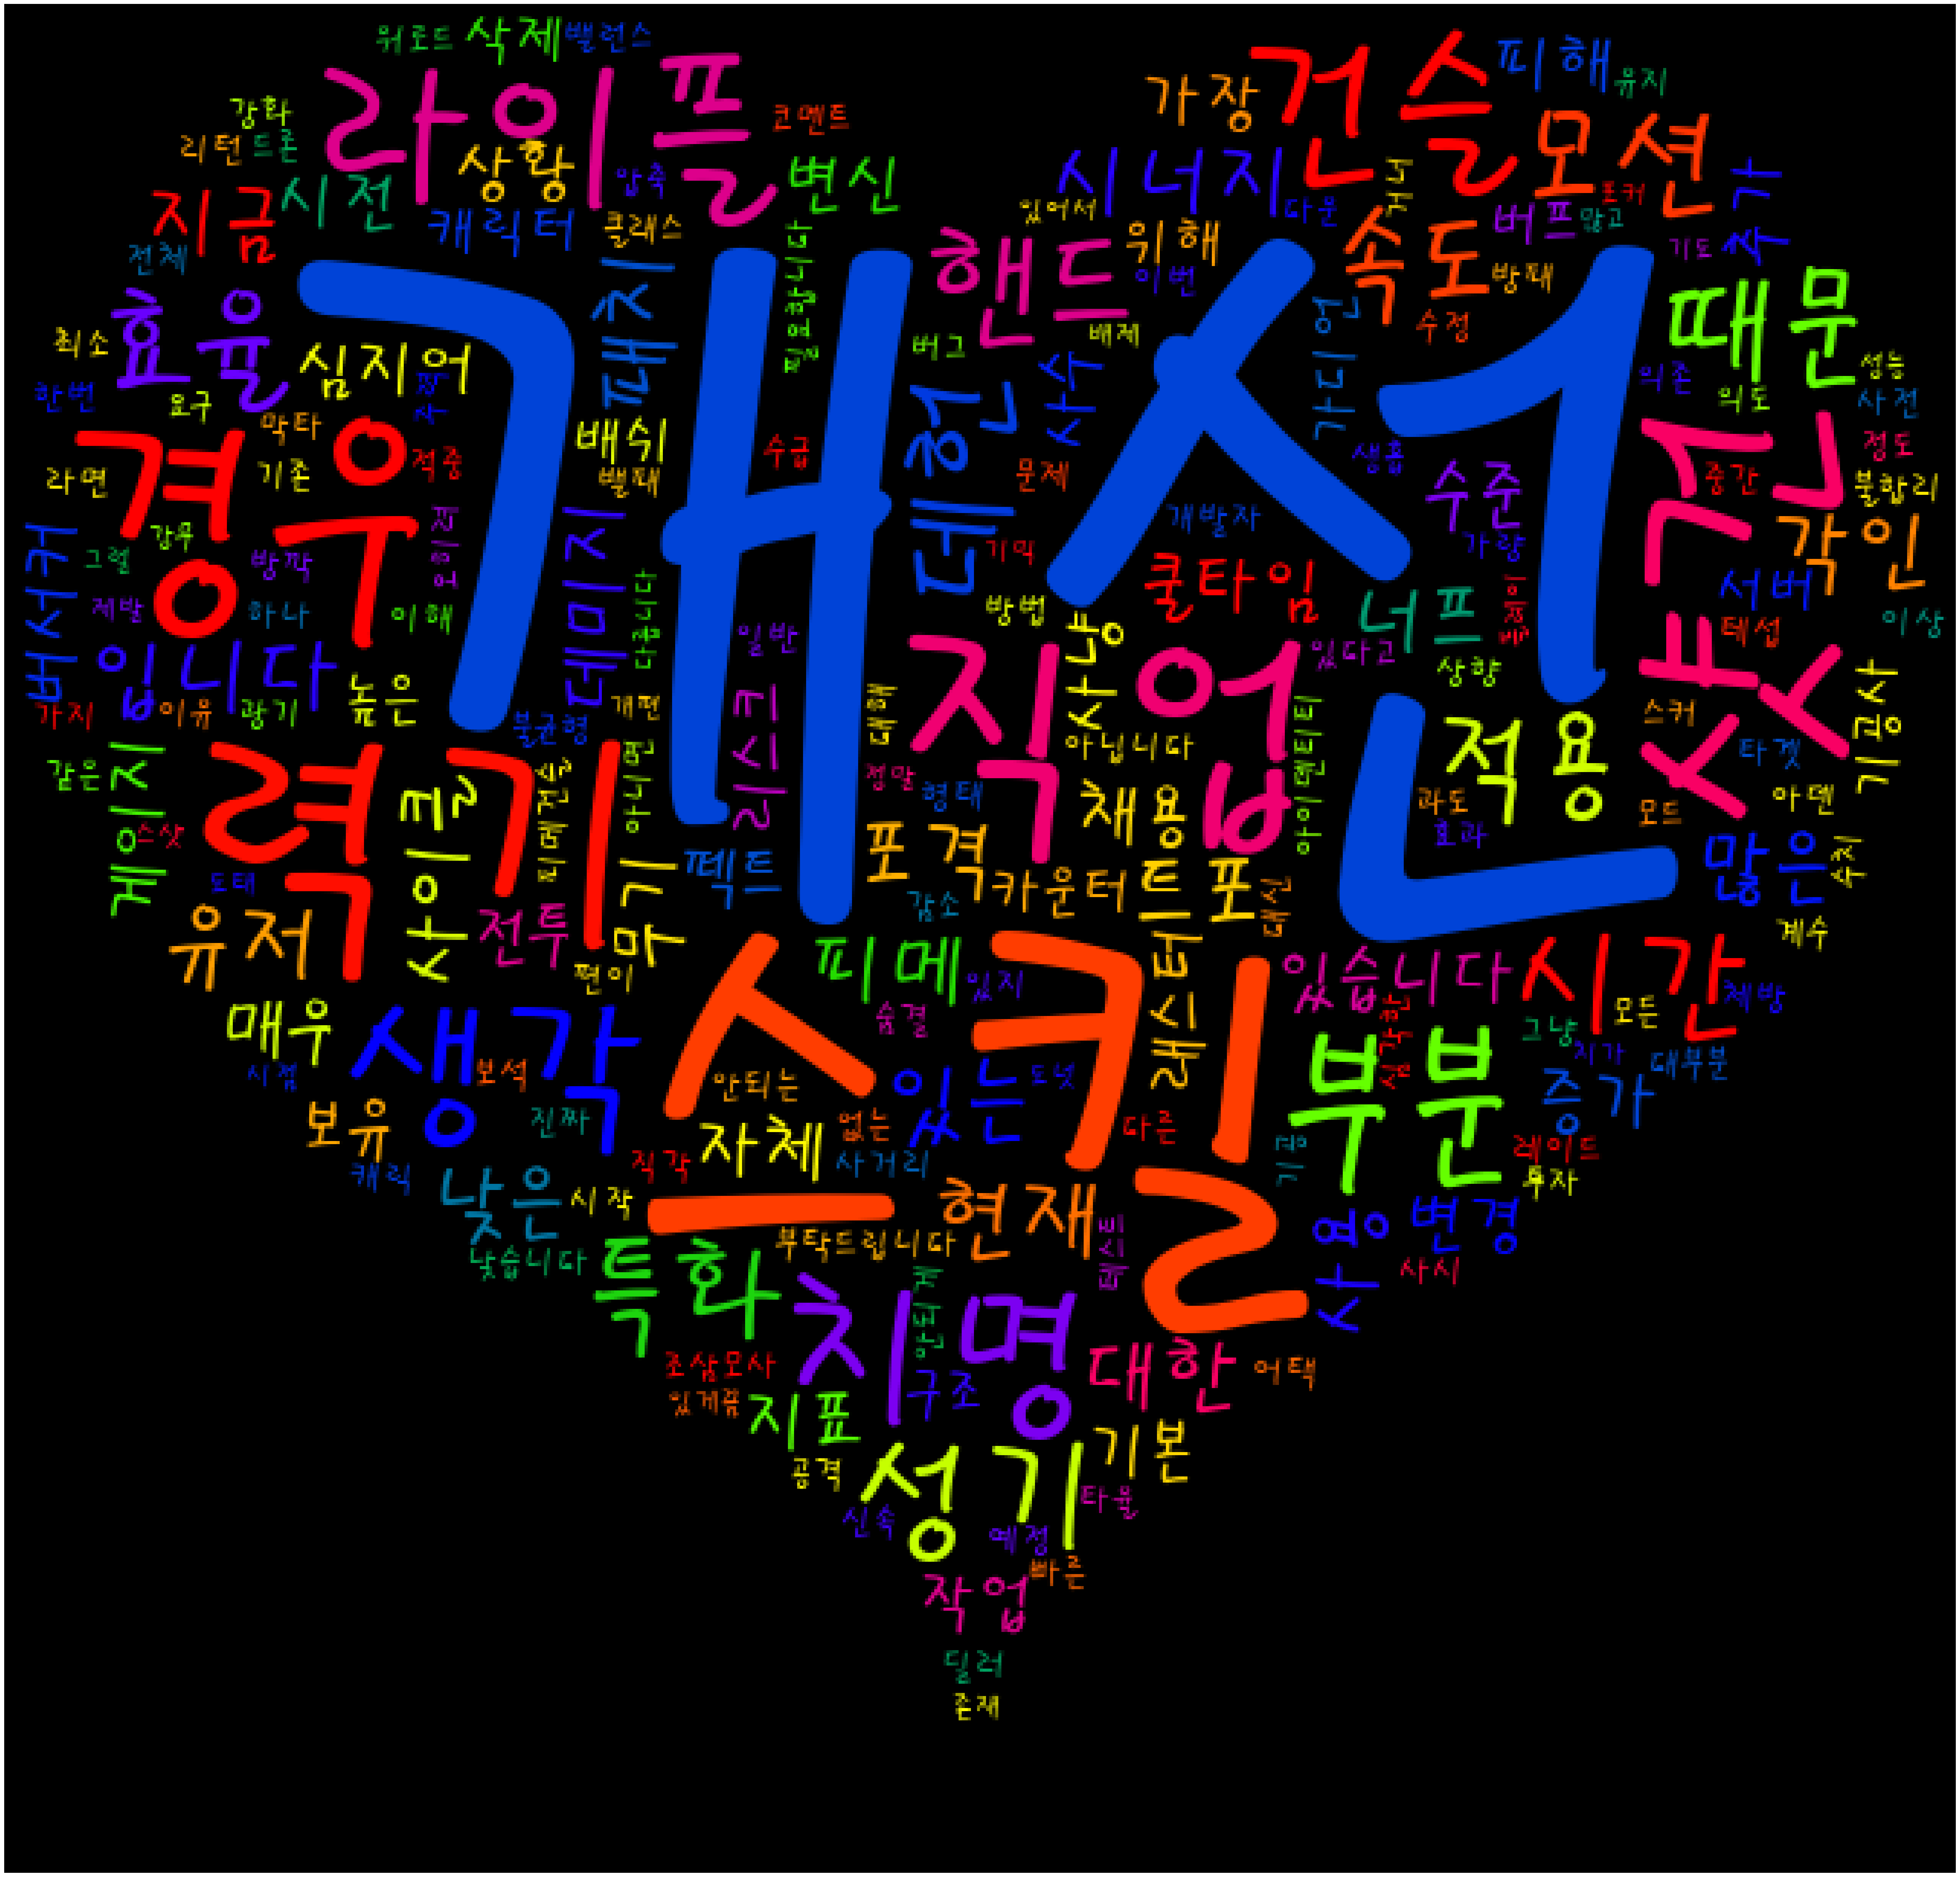

In [40]:
counts = Counter(non_word)
path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
mask = Image.new("RGBA",(640,613), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('heart.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400, mask=mask,colormap='prism').generate_from_frequencies(dict(counts))
plt.figure(figsize=(60,60), dpi=150)
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('Heart_Story.png', bbox_inches='tight', dpi=100)
plt.show()
